# Leakage Device Results

**Date:** October 28, 2020

**Device description:** Si substrate + 50 nm Al (one big lead) + 20 nm Al2O3 + 50 nm Al (4 concact leads). Each of the contact leads has an overlapping area of 0.5 x 1.5 mm2 with the bottom Al layer.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
f1 = h5py.File('dat18.h5', 'r')
f2 = h5py.File('dat14.h5', 'r')
f3 = h5py.File('dat16.h5', 'r')
f4 = h5py.File('dat20.h5', 'r')

In [3]:
list(f4.keys())

['current2400k', 'metadata', 'x_array']

In [4]:
i1 = f1['current2400k']
v1 = f1['x_array']

i2 = f2['current2400k']
v2 = f2['x_array']

i3 = f3['current2400k']
v3 = f3['x_array']

i4 = f4['current2400k']
v4 = f4['x_array']

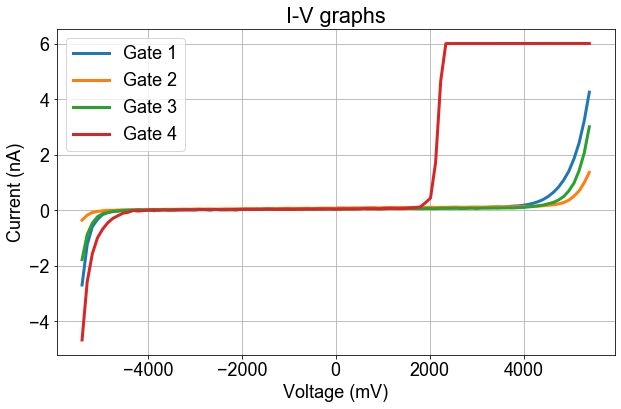

In [5]:
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
'size' : 18}
matplotlib.rc('font', **font)

plt.figure(figsize=(10,6))
plt.plot(v1,i1, v2,i2, v3, i3, v4, i4, linewidth=3)
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.grid(True, which="both", ls="-")
plt.title('I-V graphs')
plt.legend( ['Gate 1','Gate 2', 'Gate 3', 'Gate 4'], loc='upper left')

**Notes:** 

1. Breakdown voltage for the gate 4 is smaller compared to the other three gates. Probable reasons are that gate 4 is close to the edge of the chip or something happened during the fabrication.

2. It looks like that the graph for the gate 4 saturates at 6 nA, which is not the actual current and a bit misleading. The current limit we used for the measurement instrument is 6nA and any current that is more than the limit is not measured.

## Resistance calculation

Resistance is calculated for the linear region.

1. **Gate 1, 2, and 3:** -3V to +3V
2. **Gate 4:** -3V to +1V

Resistance is  82.89552015413207 Giga Ohm


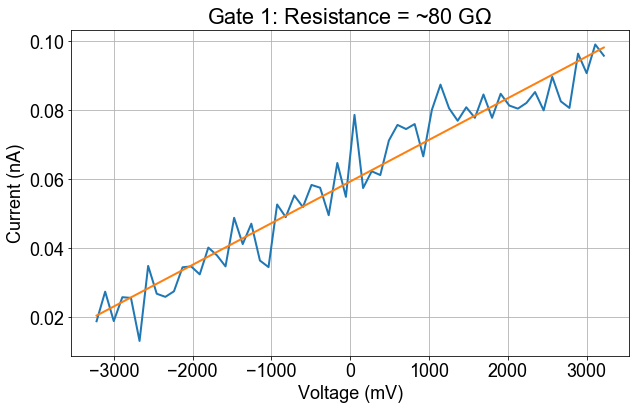

In [6]:
v = v1[20:80]
i = i1[20:80]
coefficients = np.polyfit(v,i,1)

plt.figure(figsize=(10,6))
plt.plot(v,i, v, coefficients[0]*v+coefficients[1], linewidth=2)
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.grid(True, which="both", ls="-")
plt.title(r'Gate 1: Resistance = ~80 G$\Omega$')
print('Resistance is ', 1e-3/coefficients[0], 'Giga Ohm')

Resistance is  79.81023320609593 Giga Ohm


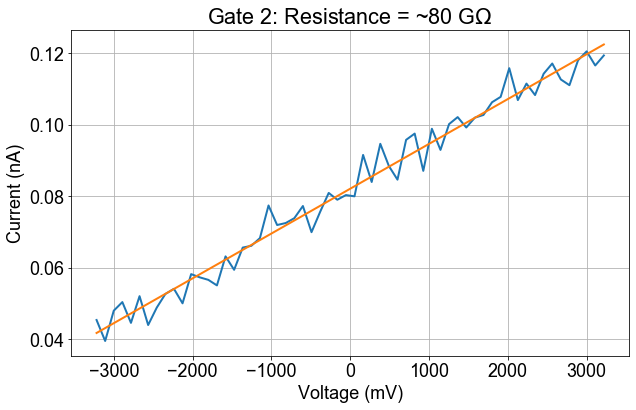

In [7]:
v = v2[20:80]
i = i2[20:80]
coefficients = np.polyfit(v,i,1)

plt.figure(figsize=(10,6))
plt.plot(v,i, v, coefficients[0]*v+coefficients[1], linewidth=2)
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.grid(True, which="both", ls="-")
plt.title(r'Gate 2: Resistance = ~80 G$\Omega$')
print('Resistance is ', 1e-3/coefficients[0], 'Giga Ohm')

Resistance is  110.65279293734582 Giga Ohm


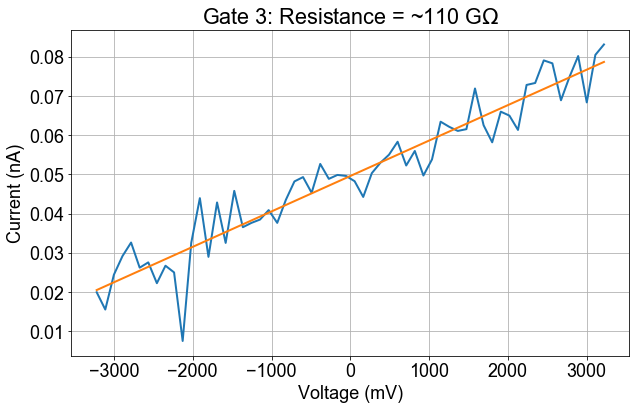

In [8]:
v = v3[20:80]
i = i3[20:80]
coefficients = np.polyfit(v,i,1)

plt.figure(figsize=(10,6))
plt.plot(v,i, v, coefficients[0]*v+coefficients[1], linewidth=2)
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.grid(True, which="both", ls="-")
plt.title(r'Gate 3: Resistance = ~110 G$\Omega$')
print('Resistance is ', 1e-3/coefficients[0], 'Giga Ohm')

Resistance is  110.09973836881092 Giga Ohm


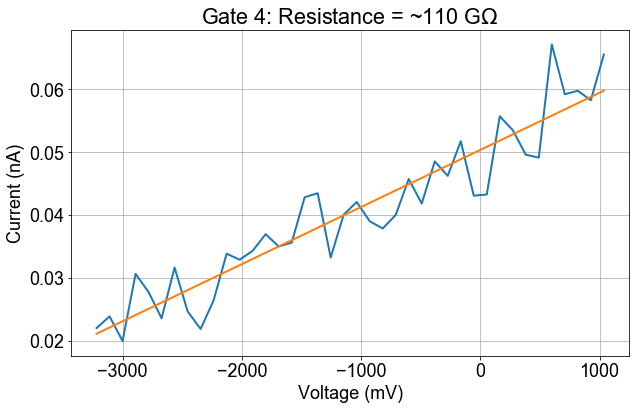

In [9]:
v = v4[20:60]
i = i4[20:60]
coefficients = np.polyfit(v,i,1)

plt.figure(figsize=(10,6))
plt.plot(v,i, v, coefficients[0]*v+coefficients[1], linewidth=2)
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.grid(True, which="both", ls="-")
plt.title(r'Gate 4: Resistance = ~110 G$\Omega$')
print('Resistance is ', 1e-3/coefficients[0], 'Giga Ohm')

## Resistivity calculation

In [10]:
Resistance = 80e9 # Considering 80 GOhm
Length = 20e-9 # 20 nm
Area = 0.5*1.5*1e-6 # 0.5 mm x 1.5 mm overlap area

rho = Resistance*Area/Length

print('Volume resistivity = ', rho/1e11, 'GOhm-cm')

Volume resistivity =  30.0 GOhm-cm


## Breakdown voltage and electric fields

In [11]:
Break_voltage = 4.5 # Considering 4.5 Volts
Length = 20e-9 # 20 nm

Break_field = Break_voltage/Length
print('Breakdown voltage is ~4.5 V and breakdown electric field is ', Break_field/1e6, 'MV/m.')

Breakdown voltage is ~4.5 V and breakdown electric field is  225.0 MV/m.


## Checking the resistance for open-circuit

In [22]:
f9 = h5py.File('dat10.h5', 'r')
i9 = f9['current2400k']
v9 = f9['x_array']

Resistance is  125.45941392658752 Giga Ohm


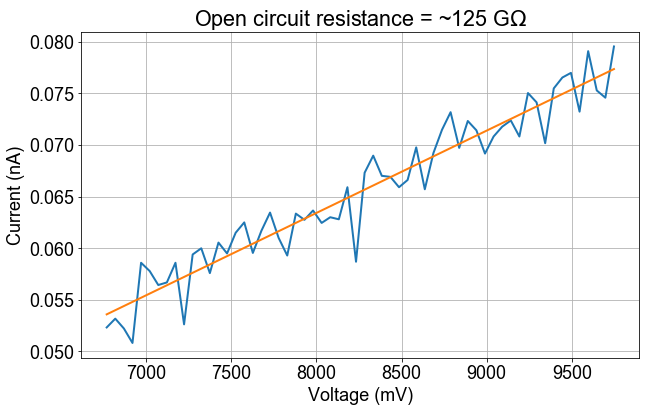

In [24]:
v = v9[35:95]
i = i9[35:95]
coefficients = np.polyfit(v,i,1)

plt.figure(figsize=(10,6))
plt.plot(v,i, v, coefficients[0]*v+coefficients[1], linewidth=2)
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.grid(True, which="both", ls="-")
plt.title(r'Open circuit resistance = ~125 G$\Omega$')
print('Resistance is ', 1e-3/coefficients[0], 'Giga Ohm')